## Importing Libraries and reading data

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

sns.set_context('notebook', font_scale=1.5)
sns.set_style('darkgrid')

%matplotlib inline

In [8]:
data = pd.read_excel('1613779-Red_wine_.xlsx')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


## Data Checks

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [10]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


In [11]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [12]:
# Replacing missing values in columns total sulfur dioxide and quality w/ median values
data.loc[:,'total sulfur dioxide'].\
        fillna(data.loc[:,'total sulfur dioxide'].median(), inplace=True)
data.loc[:,'quality'].fillna(data.loc[:,'quality'].median(), inplace=True)
data.loc[:,'pH'].fillna(data.loc[:,'pH'].median(), inplace=True)

In [13]:
# Checking the value counts for the target variable
round(100*(data.loc[:,'quality'].value_counts(normalize=True)), 2)

5.0    42.53
6.0    39.96
7.0    12.45
4.0     3.31
8.0     1.13
3.0     0.63
Name: quality, dtype: float64

## EDA

In [14]:
def hist_plot(col):
    plt.figure(figsize=(8,4))
    sns.histplot(data = data, x=col, hue='quality')
    plt.title(f'Histogram of {col}')
    plt.show()

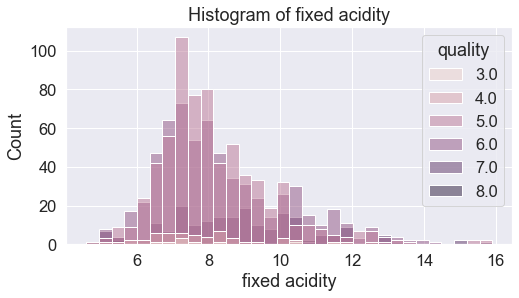

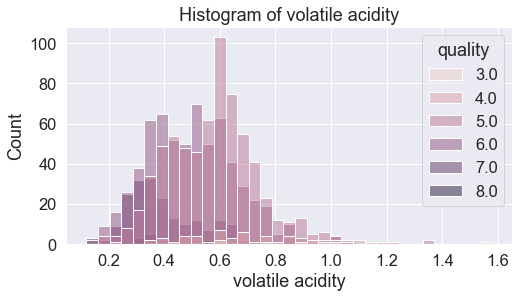

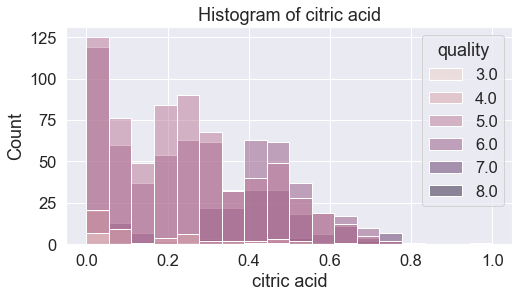

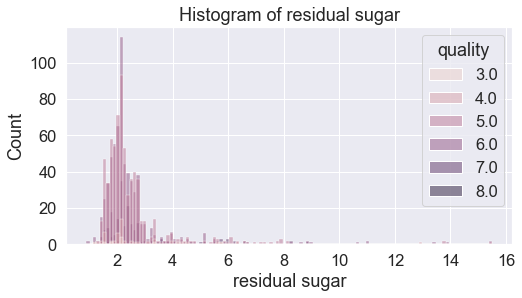

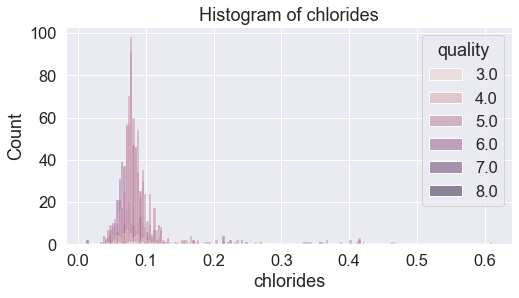

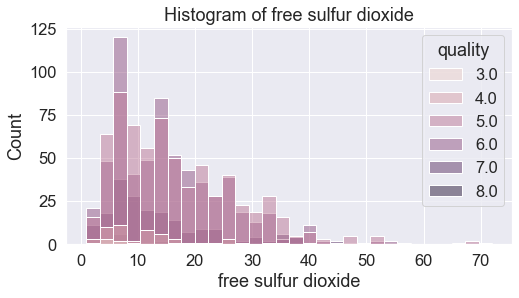

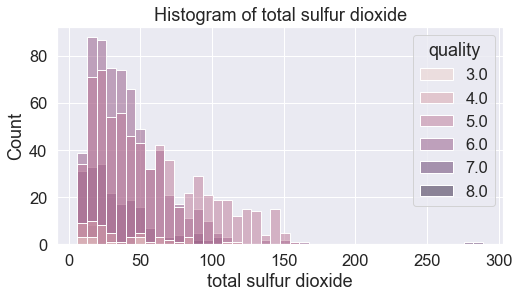

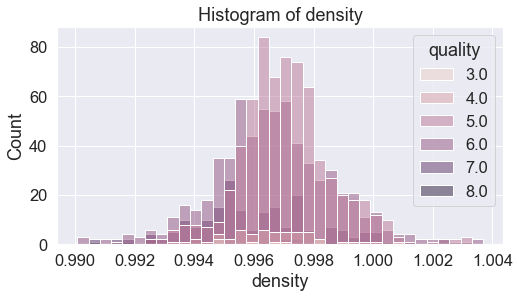

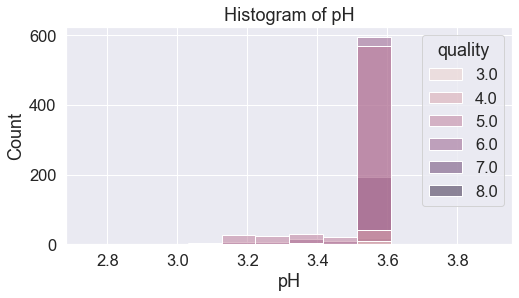

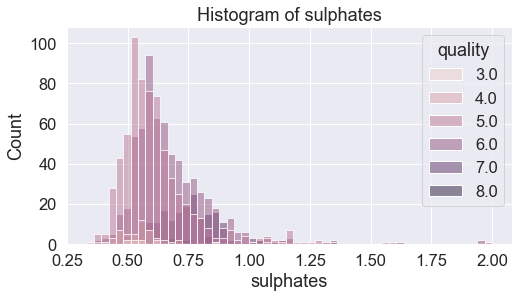

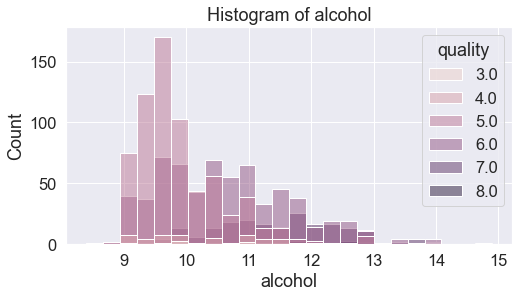

In [16]:
# Checking the histogram of each column
for col in data.columns[:-1]:
    hist_plot(col)

In [17]:
# Function for plotting box plot
def plot_box(col):
    plt.figure(figsize=(8, 4))
    sns.boxplot(data = data, x = col)
    plt.title(f"Box plot for {col}")
    plt.show()

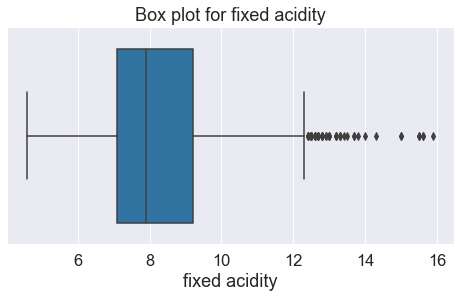

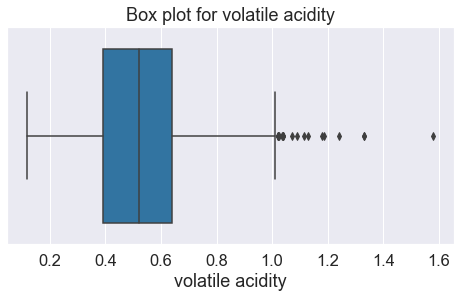

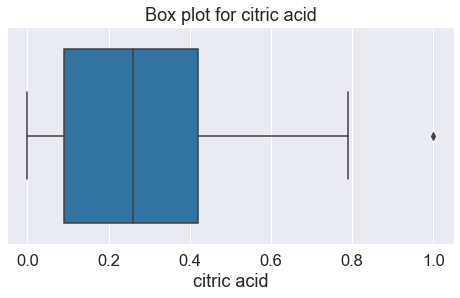

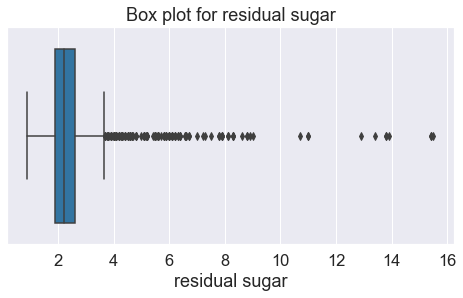

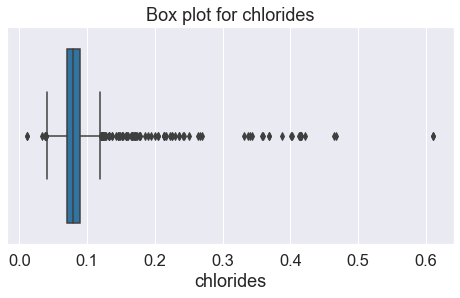

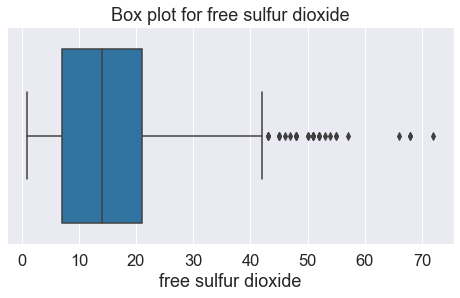

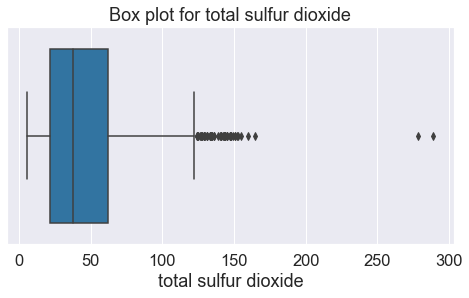

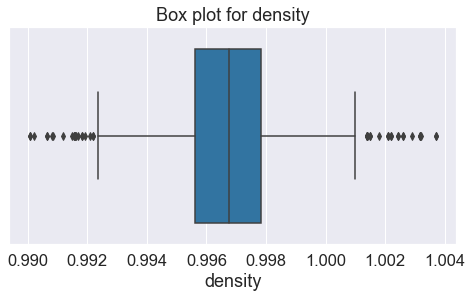

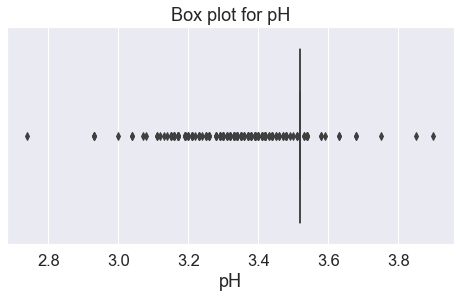

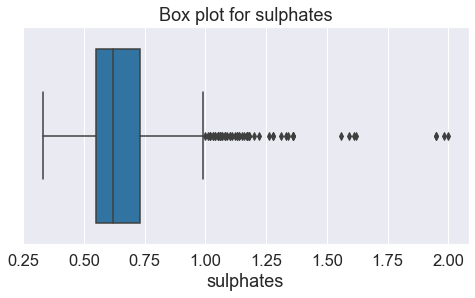

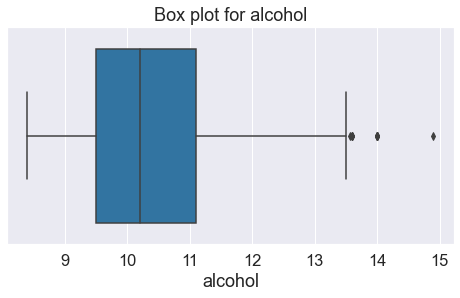

In [18]:
# Plotting a box plot to check for outliers
for col in data.columns[:-1]:
    plot_box(col)

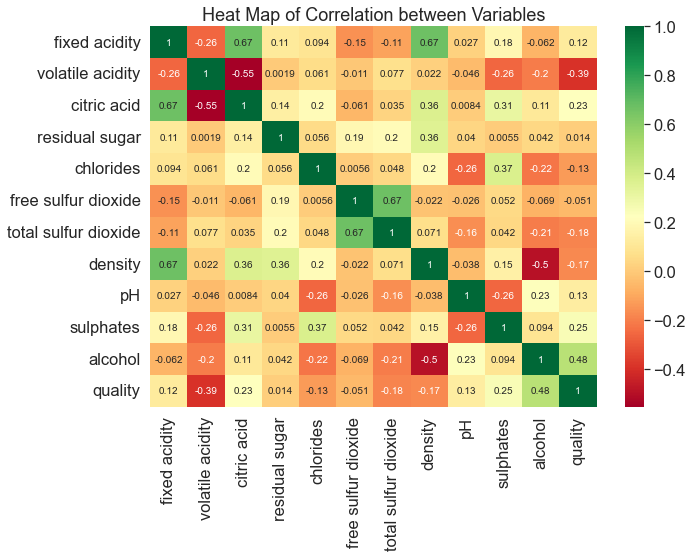

In [19]:
# Heat map to check for correlation between variables
corr = data.corr()
plt.figure(figsize=(10,7))
plt.title('Heat Map of Correlation between Variables')
sns.heatmap(corr, cmap='RdYlGn', annot=True)
plt.show()

## Data Preprocessing

In [21]:
# Splitting the data into X and y
X = data.drop(['quality', ], 1)
y = data['quality'].values

In [22]:
# Dividing data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,\
                                                    random_state=42, test_size=0.2)

In [51]:
# Scaling the data
scalar = MinMaxScaler()
X_train_scaled = scalar.fit_transform(X_train, y_train)
X_test_scaled = scalar.transform(X_test)

In [52]:
# Scaled data df
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = [X_train.columns])
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = [X_train.columns])

## Model Building

### Linear Model

In [53]:
# Function for evaluating the model
def eval_df(model, X_train, y_train, X_test, y_test, name=''):
    result = model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    metric_dict = {'R2': metrics.r2_score, 
               'RMSE': metrics.mean_squared_error, 
               'MAPE': metrics.mean_absolute_percentage_error}
    
    train_results = [round(val(y_train, y_train_pred), 2) \
                     for val in metric_dict.values()]
    test_results = [round(val(y_test, y_test_pred), 2) \
                    for val in metric_dict.values() ]
    
    df = pd.DataFrame()

    for idx, metric in enumerate(list(metric_dict.keys())):
        df.loc[name, f"{metric}_train"] = train_results[idx]
        df.loc[name, f"{metric}_test"] = test_results[idx]
        
    return df

In [54]:
linear_model_sk = LinearRegression()

eval_df(linear_model_sk, X_train_scaled, y_train,\
        X_test_scaled, y_test, 'Linear Regression')

,R2_train,R2_test,RMSE_train,RMSE_test,MAPE_train,MAPE_test
Linear Regression,0.35,0.4,0.42,0.39,0.09,0.09


In [55]:
model_eval = eval_df(linear_model_sk, X_train_scaled, y_train, \
                     X_test_scaled, y_test, 'Linear Regression')

### Random Forrest Regressor

In [56]:
rf_model = RandomForestRegressor()

In [57]:
n_estimators = [10, 20, 30, 50, 90, 100, 150, 200]
max_features = ['auto', 'sqrt']
max_depth = [2, 4, 6, None]
min_samples_leaf = [1, 2, 3]

params_grid = {"n_estimators": n_estimators,
               "max_features": max_features,
               "max_depth": max_depth,
               "min_samples_leaf": min_samples_leaf}


In [58]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator=rf_model, param_grid=params_grid, 
                       cv=3, n_jobs=-1, verbose=0)

In [59]:
model_eval = model_eval.append(eval_df(rf_grid, X_train_scaled, y_train, 
        X_test_scaled, y_test, 'Random Forrest CV'))

In [60]:
model_eval

,R2_train,R2_test,RMSE_train,RMSE_test,MAPE_train,MAPE_test
Linear Regression,0.35,0.40,0.42,0.39,0.09,0.09
Random Forrest CV,0.93,0.54,0.05,0.30,0.03,0.08


### SVR Model

In [61]:
svr = SVR()
model_eval = model_eval.append(eval_df(svr, X_train_scaled, y_train, 
            X_test_scaled, y_test, 'SVM Regressor'))

In [63]:
model_eval

,R2_train,R2_test,RMSE_train,RMSE_test,MAPE_train,MAPE_test
Linear Regression,0.35,0.40,0.42,0.39,0.09,0.09
Random Forrest CV,0.93,0.54,0.05,0.30,0.03,0.08
SVM Regressor,0.44,0.44,0.37,0.36,0.08,0.08


### Ridge Regression Model

In [64]:
ridge = Ridge()
model_eval = model_eval.append(eval_df(ridge, X_train_scaled, y_train, 
            X_test_scaled, y_test, 'Ridge Model'))

In [65]:
model_eval

,R2_train,R2_test,RMSE_train,RMSE_test,MAPE_train,MAPE_test
Linear Regression,0.35,0.40,0.42,0.39,0.09,0.09
Random Forrest CV,0.93,0.54,0.05,0.30,0.03,0.08
SVM Regressor,0.44,0.44,0.37,0.36,0.08,0.08
Ridge Model,0.35,0.40,0.42,0.39,0.09,0.09


### XGBoost Model

In [66]:
xgb_reg = XGBRegressor()

In [67]:
model_eval = model_eval.append(eval_df(xgb_reg, X_train_scaled, y_train, 
            X_test_scaled, y_test, 'XGBoost Model'))

## Model Evaulation

In [68]:
model_eval

,R2_train,R2_test,RMSE_train,RMSE_test,MAPE_train,MAPE_test
Linear Regression,0.35,0.40,0.42,0.39,0.09,0.09
Random Forrest CV,0.93,0.54,0.05,0.30,0.03,0.08
SVM Regressor,0.44,0.44,0.37,0.36,0.08,0.08
Ridge Model,0.35,0.40,0.42,0.39,0.09,0.09
XGBoost Model,1.00,0.42,0.00,0.38,0.01,0.08


In [69]:
def plot_results(col):
    plt.figure(figsize=(9, 4))
    sns.barplot(data = model_eval, y = model_eval.index, x = col, 
                orient='h')
    plt.show()

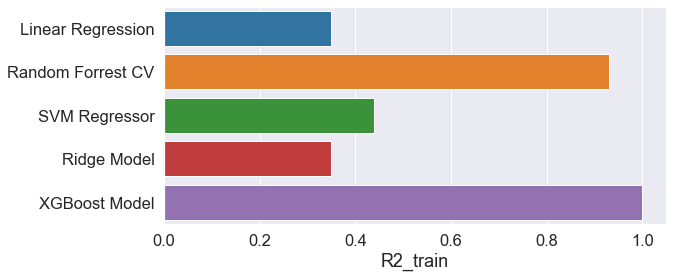

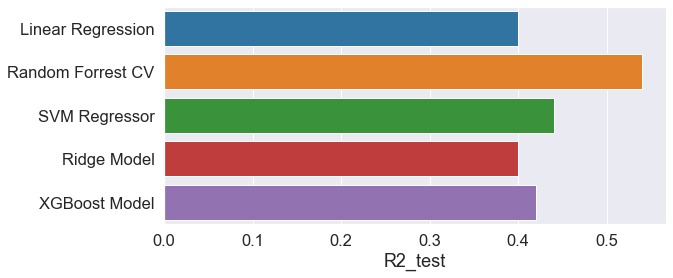

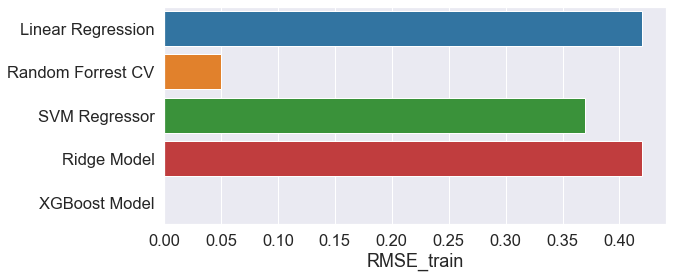

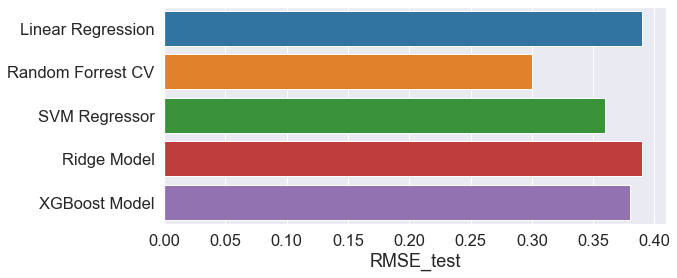

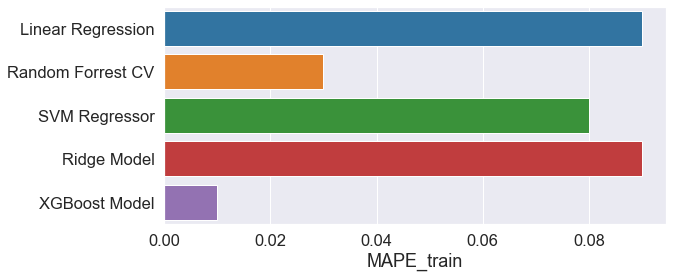

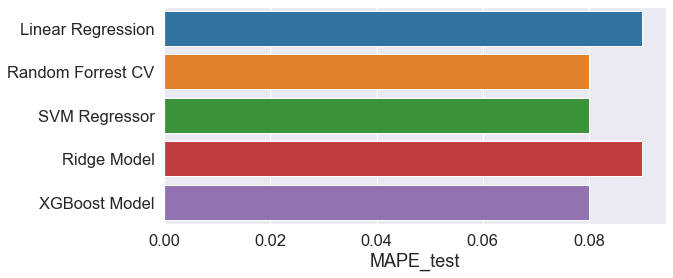

In [70]:
for col in model_eval.columns:
    plot_results(col)

### Getting the most important predictors

In [71]:
linear_model = sm.OLS(y_train, X_train_scaled_df)
results = linear_model.fit()

In [72]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              6169.
Date:                Thu, 14 Jul 2022   Prob (F-statistic):                        0.00
Time:                        02:51:35   Log-Likelihood:                         -1479.6
No. Observations:                1279   AIC:                                      2981.
Df Residuals:                    1268   BIC:                                      3038.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.2636      0.270      0.976      0.329      -0.266       0.793
volatile acidity        -0.5485      0.232     -2.365      0.018      -1.004      -0.093
citric acid             -0.1178      0.198     -0.594      0.553      -0.507       0.271
residual sugar          -0.6705      0.269     -2.494      0.013      -1.198      -0.143
chlorides                0.3289      0.313      1.051      0.294      -0.285       0.943
free sulfur dioxide      0.3277      0.197      1.660      0.097      -0.060       0.715
total sulfur dioxide     0.0152      0.270      0.056      0.955      -0.515       0.546
density                  1.1722      0.311      3.774      0.000       0.563       1.782
pH                       5.8678      0.210     27.914      0.000       5.455       6.280
sulphates                2.6905      0.245     10.997      0.000       2.211       3.170
alcohol                  2.4383      0.196     12.468      0.000       2.055       2.822
==============================================================================
Omnibus:                       47.250   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.061
Skew:                          -0.149   Prob(JB):                     1.03e-25
Kurtosis:                       4.439   Cond. No.                         22.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
feature_importance = pd.DataFrame(columns = ['Feature', 'Importance'])
feature_importance['Feature'] = results.params.sort_values(ascending=False).index
feature_importance['Importance'] = results.params.sort_values(ascending=False).values
feature_importance

,Feature,Importance
0,pH,5.867784
1,sulphates,2.690507
2,alcohol,2.438268
3,density,1.172188
4,chlorides,0.328910
5,free sulfur dioxide,0.327746
6,fixed acidity,0.263560
7,total sulfur dioxide,0.015246
8,citric acid,-0.117767
9,volatile acidity,-0.548487


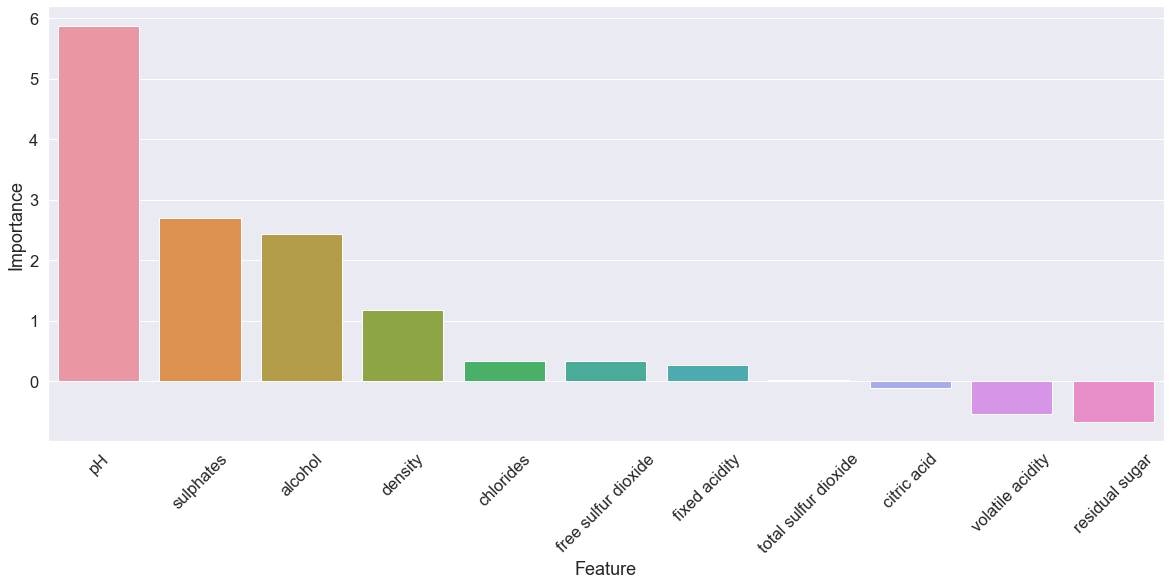

In [74]:
plt.figure(figsize=(20, 8))
sns.barplot(data = feature_importance, x = 'Feature', y = 'Importance')
plt.xticks(rotation=45)
plt.show()